In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


creditcard = pd.read_csv("creditcard.csv")

creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
creditcard.shape

(284807, 31)

In [3]:
creditcard.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [4]:
na_df = pd.DataFrame({'column_name': creditcard.columns,
                     'na_count': creditcard.isnull().sum(),
                     'na_percentage': creditcard.isnull().sum()/len(creditcard)*100})

na_df.sort_values(by='na_percentage', ascending=False)

,column_name,na_count,na_percentage
Time,Time,0,0.0
V16,V16,0,0.0
Amount,Amount,0,0.0
V28,V28,0,0.0
V27,V27,0,0.0
V26,V26,0,0.0
V25,V25,0,0.0
V24,V24,0,0.0
V23,V23,0,0.0
V22,V22,0,0.0


In [5]:
cols_to_drop = []

for col in creditcard.columns:
    if len(creditcard[col].unique())==1 or len(creditcard[col].unique())==creditcard.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop

[]

In [6]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


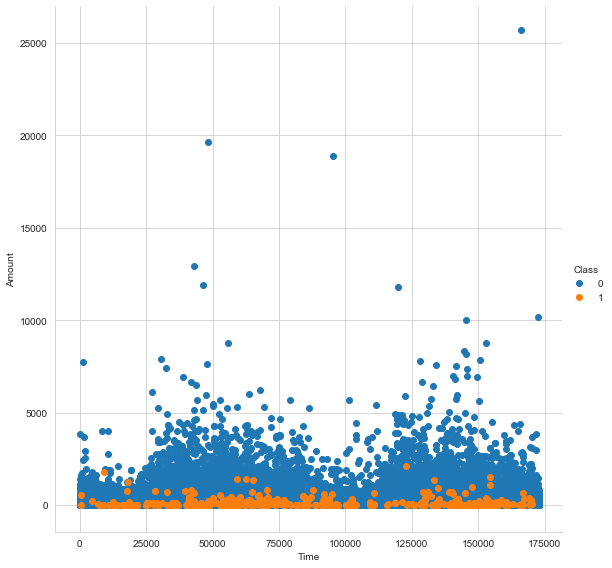

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 8).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

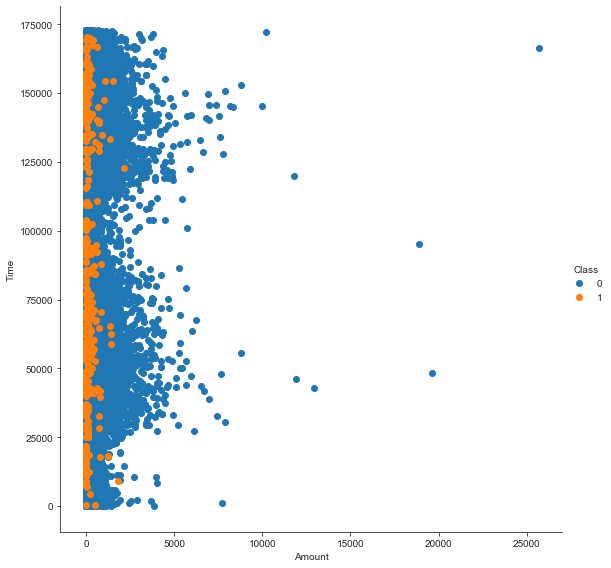

In [10]:
sns.set_style("ticks")
sns.FacetGrid(creditcard, hue="Class", size = 8).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [11]:
req_data = creditcard[['Time','Amount', 'Class']]

req_data

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [12]:
countLess_2500 = 0
countMore_2500= 0
for i in range(284806):
    if(req_data.iloc[i]["Amount"] < 2500):
        countLess_2500 = countLess_2500 + 1
    else:
        countMore_2500 = countMore_2500 + 1
print(countLess_2500)
print(countMore_2500)

284357
449


In [13]:
percentage_less_2500 = (countLess_2500/284807)*100
percentage_less_2500

99.84199826549207

In [14]:
class_0 = 0
class_1 = 0
for i in range(284806):
    if(req_data.iloc[i]["Amount"] < 2500):
        if(req_data.iloc[i]["Class"] == 0):
            class_0 = class_0 + 1
        else:
            class_1 = class_1 + 1
        
print(class_0)
print(class_1)

283865
492


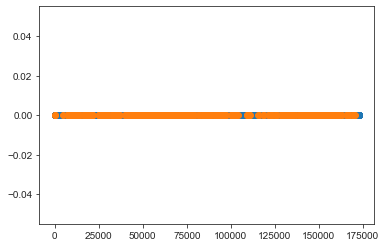

In [15]:
genuine_cc = req_data.loc[req_data["Class"] == 0]
fraud_cc = req_data.loc[req_data["Class"] == 1]

plt.plot(genuine_cc["Time"], np.zeros_like(genuine_cc["Time"]), "o")
plt.plot(fraud_cc["Time"], np.zeros_like(fraud_cc["Time"]), "o")

plt.show()

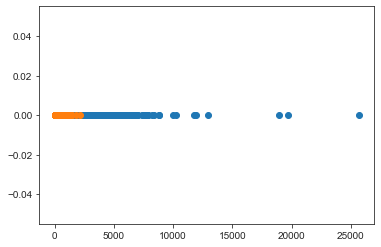

In [16]:
plt.plot(genuine_cc["Amount"], np.zeros_like(genuine_cc["Amount"]), "o")
plt.plot(fraud_cc["Amount"], np.zeros_like(fraud_cc["Amount"]), "o")

plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


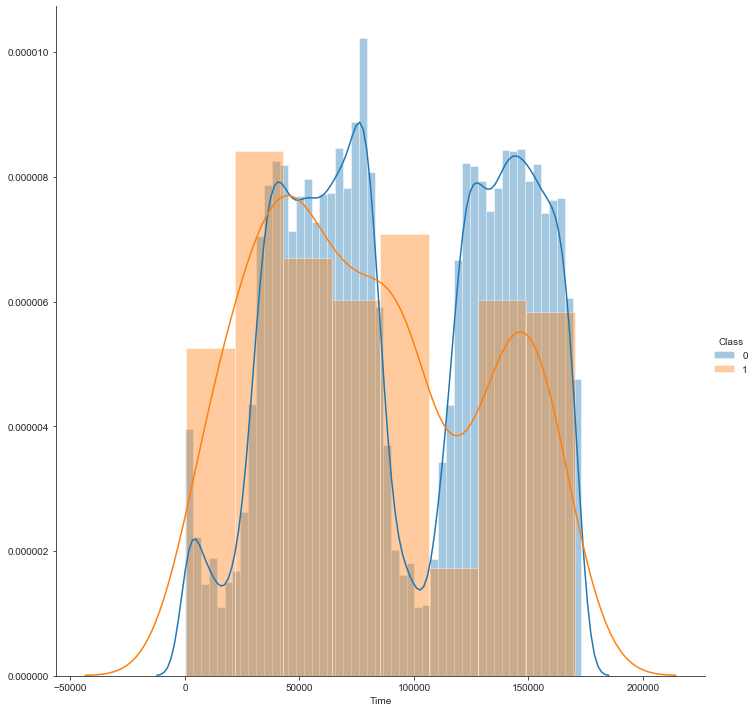

In [17]:
sns.FacetGrid(req_data, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

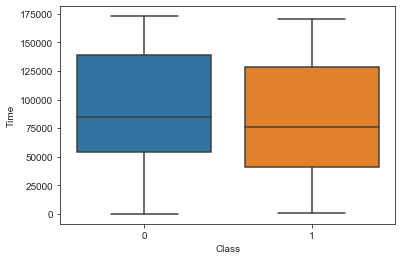

In [18]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


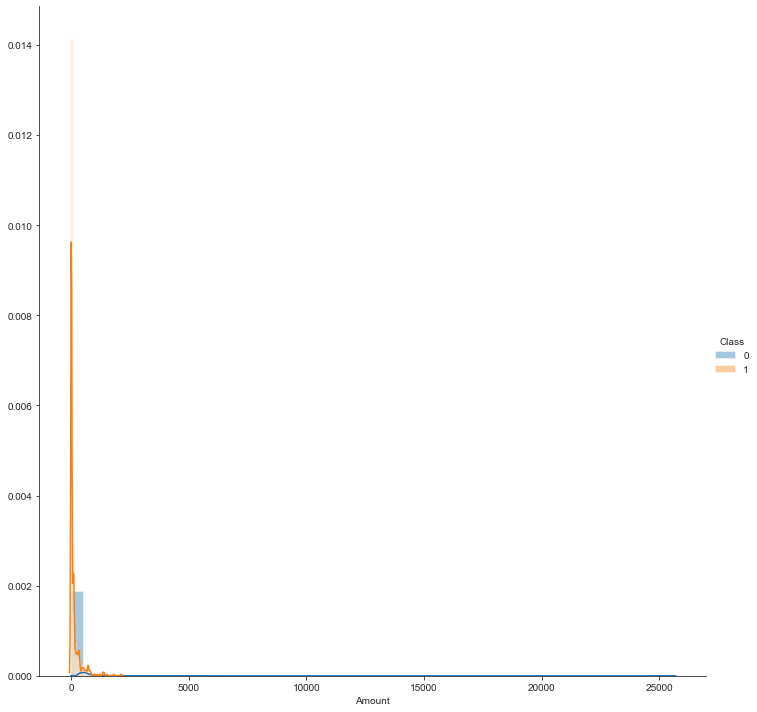

In [19]:
sns.FacetGrid(req_data, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

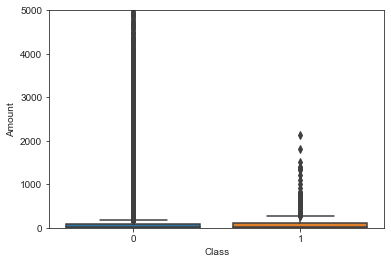

In [20]:

sns.boxplot(x = "Class", y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

### Note:

All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

In [21]:
genuine_cc_mean = np.mean(genuine_cc["Amount"])
fraud_cc_mean = np.mean(fraud_cc["Amount"])
print("genuine_CreditCard_mean =", genuine_cc_mean)
print("fraud_creditCard_mean =",fraud_cc_mean)

genuine_CreditCard_mean = 88.29102242225574
fraud_creditCard_mean = 122.21132113821133


In [22]:
genuine_cc_median = np.median(genuine_cc["Amount"])
fraud_cc_median = np.median(fraud_cc["Amount"])
print("genuine_CreditCard_Median =", genuine_cc_median)
print("fraud_creditCard_Median =",fraud_cc_median)

genuine_CreditCard_Median = 22.0
fraud_creditCard_Median = 9.25


In [23]:
genuine_cc_std = np.std(genuine_cc["Amount"])
fraud_cc_std = np.std(fraud_cc["Amount"])
print("genuine_CreditCard_Standard Deviation =", genuine_cc_std)
print("fraud_creditCard_Standard Deviation =",fraud_cc_std)

genuine_CreditCard_Standard Deviation = 250.1046523874637
fraud_creditCard_Standard Deviation = 256.42229861324483


In [24]:
print("\nQuantiles:")
print(np.percentile(genuine_cc["Amount"],np.arange(0, 100, 25)))
print(np.percentile(fraud_cc["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]
